# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [3]:
import pandas as pd

df = pd.read_csv('data.csv')

last_column = df.columns[-1]
temp_data = df[last_column].astype(str)

df['plans_university'] = temp_data.str.extract(r'([-]?\d)\d*')[0].astype(int)
df['past_failures'] = temp_data.str.extract(r'(\d)$')[0].astype(int)

df = df.drop(last_column, axis=1)
df.to_csv('data2.csv', index=False)

### Задача 2: пропуски в данных
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('data2.csv')

missing_columns = df.columns[df.isnull().any()].tolist()

for col in missing_columns:
    if df[col].dtype in [np.float64, np.int64]:
        mean_val = df[col].mean()
        df.loc[df[col].isnull(), col] = mean_val

df.to_csv('data3.csv', index=False)

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [46]:
import pandas as pd
df = pd.read_csv('data3.csv')

for i in df.columns:
  df[i] = (df[i] - df[i].min() + 1) / (df[i].max() - df[i].min() + 1)

df.to_csv('data4.csv', index=False)

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

data = pd.read_csv('data4.csv')
score = pd.read_csv('scores.csv', header=None, names=['score'])

X = data
Y = score['score']

model = LinearRegression()

scores = cross_val_score(model, X, Y, cv=4, scoring='r2')

for i, score in enumerate (scores, 1):
  print(f"Разбиение {i}: {score:.4f}")
print(f"Среднее качество: {scores.mean():.4f}")

Разбиение 1: 0.2156
Разбиение 2: 0.2593
Разбиение 3: 0.1421
Разбиение 4: 0.2324
Среднее качество: 0.2123


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data4.csv')
att = pd.read_csv('attendance.csv', sep=';')

with open("school_support.txt", 'r') as file:
    lines = [line.strip() for line in file.readlines() if line.strip().isdigit()]
    support_ids = [int(line) for line in lines]
    data['supply'] = [1 if i in support_ids else 0 for i in range(1, len(data) + 1)]

attendance_count = []
for i in range(len(att)):
    row = att.iloc[i]
    count = (row == '+').sum()
    attendance_count.append(count)

data['attendance_count'] = attendance_count
data['attendance_count'] /= 32
score = pd.read_csv('scores.csv', header=None, names=['score'])
data.to_csv('data5.csv', index=False)

X = data
Y = score['score']

model = LinearRegression()

scores = cross_val_score(model, X, Y, cv=4, scoring='r2')

for i, score_val in enumerate(scores, 1):
    print(f"Разбиение {i}: {score_val:.4f}")
print(f"Среднее качество: {scores.mean():.4f}")

Разбиение 1: 0.2168
Разбиение 2: 0.2546
Разбиение 3: 0.1294
Разбиение 4: 0.2298
Среднее качество: 0.2076


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

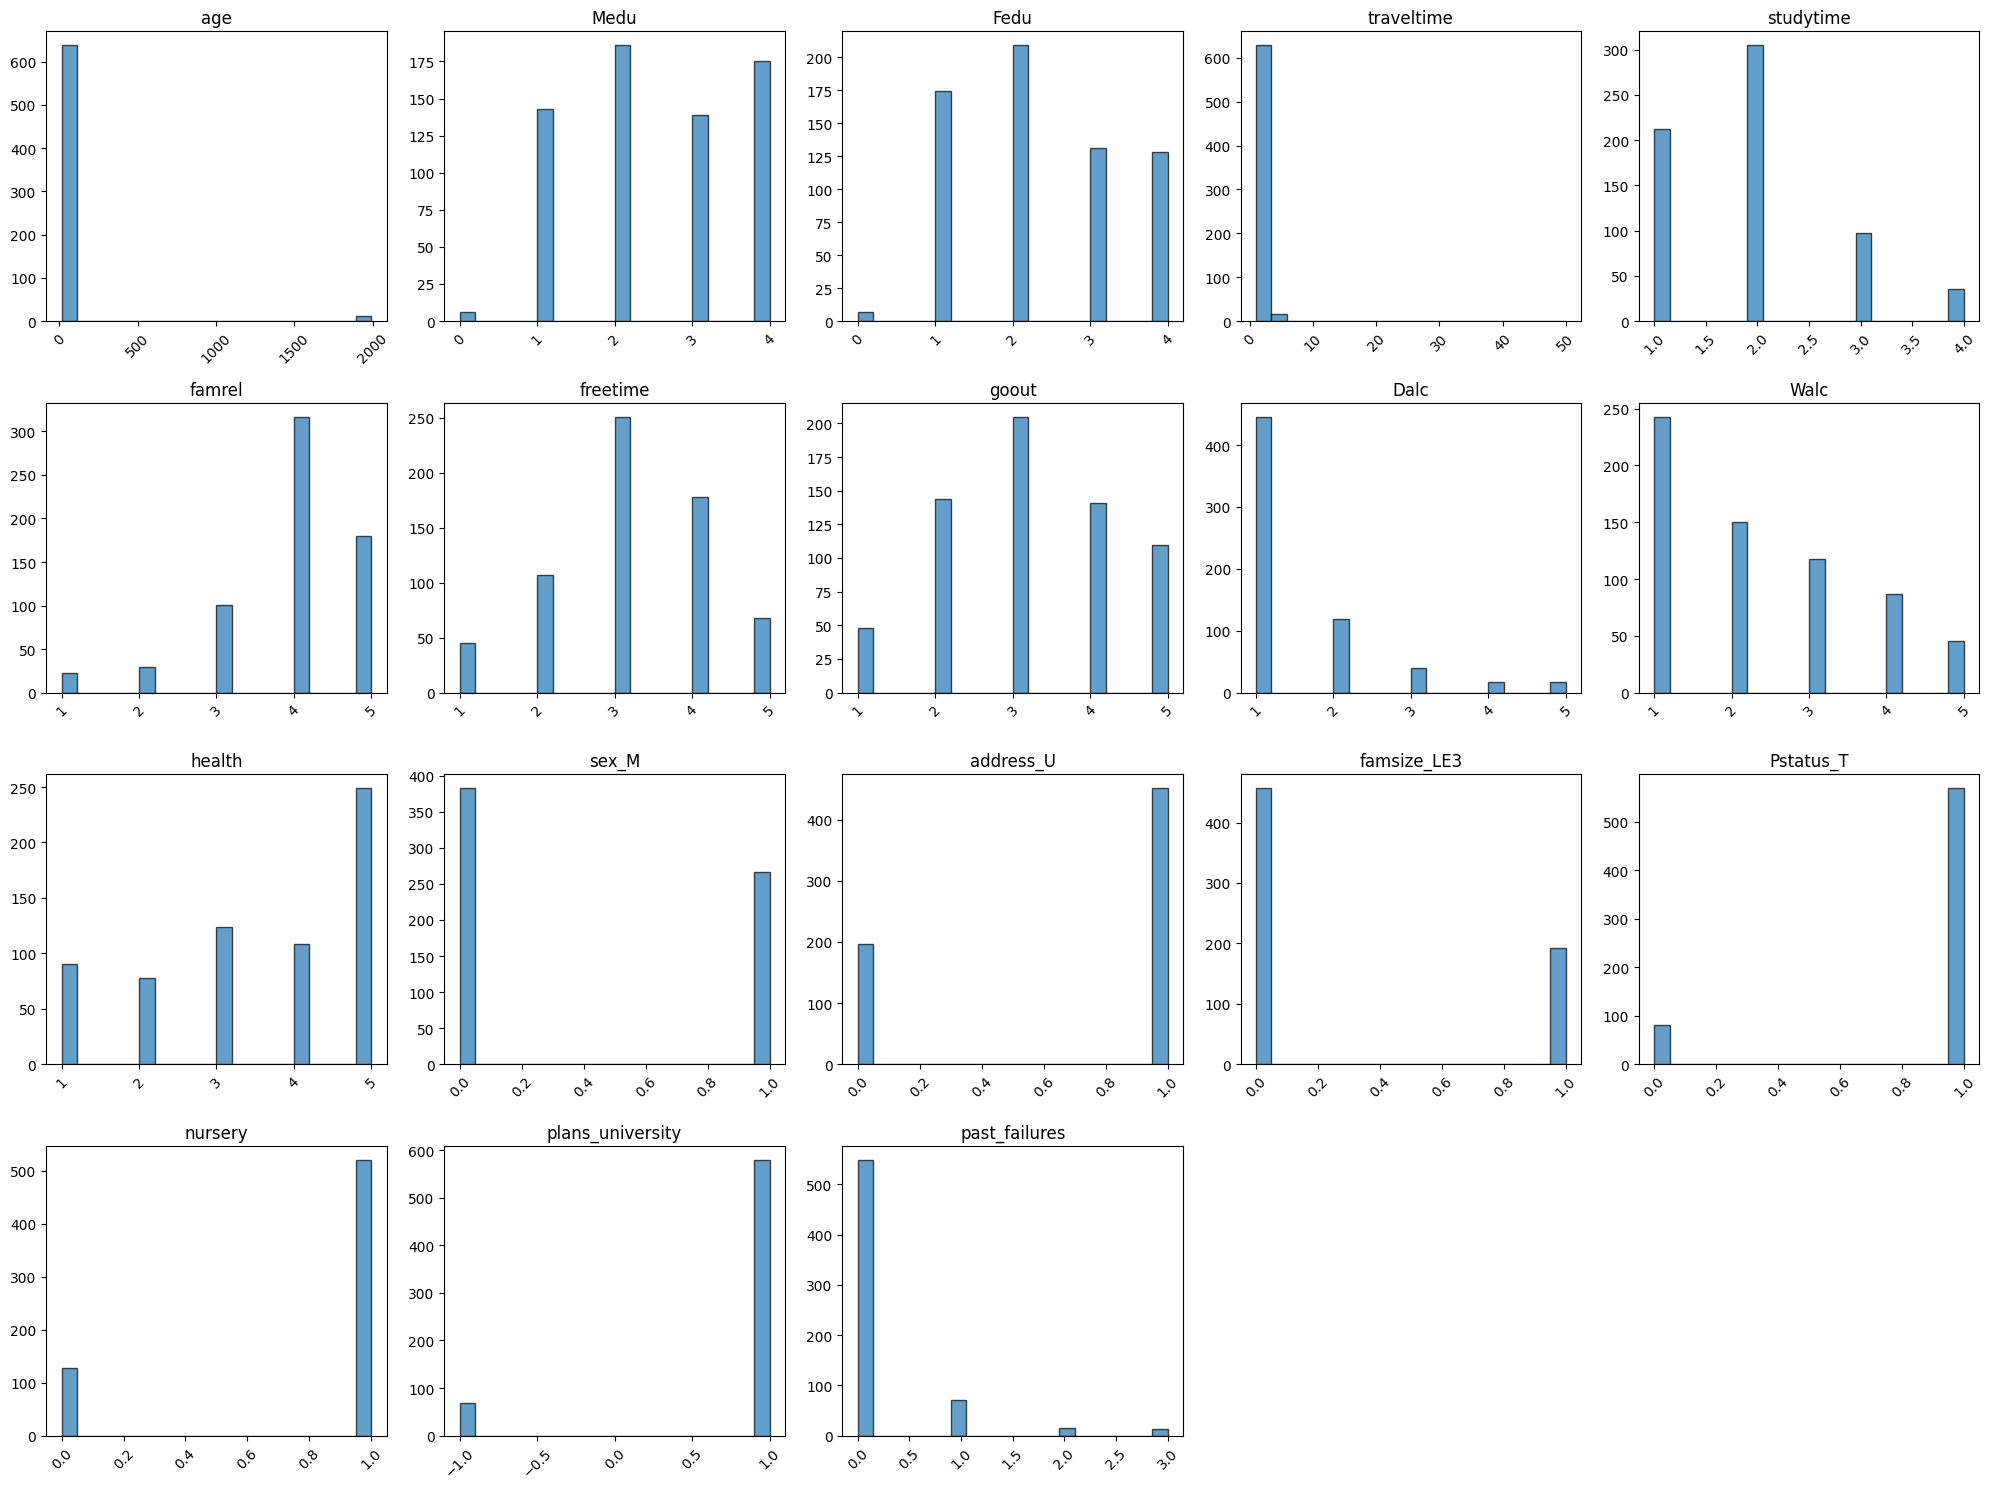

age выбросы: [1987 1988 1989 1990 1991]
traveltime выбросы: [10 25 50 40]
goout выбросы: [nan]
Dalc выбросы: [nan]
Walc выбросы: [nan]
Заменены выбросы в age: 11 значений на 17.0
Заменены выбросы в traveltime: 4 значений на 1.0
Заменены выбросы в goout: 1 значений на 3.0
Заменены выбросы в Dalc: 10 значений на 1.0
Заменены выбросы в Walc: 6 значений на 2.0

Качество после обработки выбросов:
Разбиение 1: 0.2480
Разбиение 2: 0.2549
Разбиение 3: 0.1419
Разбиение 4: 0.2167
Среднее качество: 0.2154


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

data_original = pd.read_csv('data2.csv')

plt.figure(figsize=(20, 15))
for i, column in enumerate(data_original.columns, 1):
    plt.subplot(4, 5, i)
    plt.hist(data_original[column], bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'{column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

outliers_info = {}

age_outliers = data_original[~data_original['age'].between(15, 25)]
if len(age_outliers) > 0:
    outliers_info['age'] = age_outliers['age'].unique()
    print(f"age выбросы: {age_outliers['age'].unique()}")

for col in ['Medu', 'Fedu']:
    outliers = data_original[~data_original[col].between(0, 4)]
    if len(outliers) > 0:
        outliers_info[col] = outliers[col].unique()
        print(f"{col} выбросы: {outliers[col].unique()}")

traveltime_outliers = data_original[~data_original['traveltime'].between(1, 4)]
if len(traveltime_outliers) > 0:
    outliers_info['traveltime'] = traveltime_outliers['traveltime'].unique()
    print(f"traveltime выбросы: {traveltime_outliers['traveltime'].unique()}")

studytime_outliers = data_original[~data_original['studytime'].between(1, 4)]
if len(studytime_outliers) > 0:
    outliers_info['studytime'] = studytime_outliers['studytime'].unique()
    print(f"studytime выбросы: {studytime_outliers['studytime'].unique()}")

scale_1_5 = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
for col in scale_1_5:
    outliers = data_original[~data_original[col].between(1, 5)]
    if len(outliers) > 0:
        outliers_info[col] = outliers[col].unique()
        print(f"{col} выбросы: {outliers[col].unique()}")

past_failures_outliers = data_original[~data_original['past_failures'].between(0, 4)]
if len(past_failures_outliers) > 0:
    outliers_info['past_failures'] = past_failures_outliers['past_failures'].unique()
    print(f"past_failures выбросы: {past_failures_outliers['past_failures'].unique()}")

data_cleaned = data_original.copy()

# Для каждого признака с выбросами заменяем их медианой
for col in outliers_info:
    if col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'past_failures'] + scale_1_5:
        # Определяем допустимый диапазон
        if col in ['age']:
            min_val, max_val = 15, 25
        elif col in ['Medu', 'Fedu']:
            min_val, max_val = 0, 4
        elif col in ['traveltime', 'studytime']:
            min_val, max_val = 1, 4
        elif col in scale_1_5:
            min_val, max_val = 1, 5
        elif col in ['past_failures']:
            min_val, max_val = 0, 4

        # Вычисляем медиану в допустимом диапазоне
        median_val = data_cleaned[data_cleaned[col].between(min_val, max_val)][col].median()

        # Заменяем выбросы
        outlier_mask = ~data_cleaned[col].between(min_val, max_val)
        data_cleaned.loc[outlier_mask, col] = median_val

        print(f"Заменены выбросы в {col}: {outlier_mask.sum()} значений на {median_val}")

# Добавляем новые признаки (как в предыдущих задачах)
att = pd.read_csv('attendance.csv', sep=';')

attendance_count = []
for i in range(len(att)):
    row = att.iloc[i]
    count = (row == '+').sum()
    attendance_count.append(count)

data_cleaned['attendance_count'] = attendance_count
data_cleaned['attendance_count'] = data_cleaned['attendance_count'] / 32

with open("school_support.txt", 'r') as file:
    lines = [line.strip() for line in file.readlines() if line.strip().isdigit()]
    support_ids = [int(line) for line in lines]
    data_cleaned['supply'] = [1 if i in support_ids else 0 for i in range(1, len(data_cleaned) + 1)]

# Нормализуем все числовые признаки
numerical_columns = data_cleaned.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Загружаем оценки и выравниваем размеры
score = pd.read_csv('scores.csv', header=None, names=['score'])
min_size = min(len(data_cleaned), len(score))
data_cleaned = data_cleaned.iloc[:min_size]
score = score.iloc[:min_size]

# Сохраняем очищенные данные
data_cleaned.to_csv('data_cleaned.csv', index=False)

# Проверяем качество
X = data_cleaned
Y = score['score']

model = LinearRegression()
scores_cleaned = cross_val_score(model, X, Y, cv=4, scoring='r2')

print("\nКачество после обработки выбросов:")
for i, score_val in enumerate(scores_cleaned, 1):
    print(f"Разбиение {i}: {score_val:.4f}")
print(f"Среднее качество: {scores_cleaned.mean():.4f}")

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных.

После добавления новых данных качество линейной регрессии упало, что говорит о криворукости школьника, который делал это задание, но от качественной обработки выбросов от китайских нейросетей линейная регрессия с новым параметром показала более хороший результат, чем регрессия без нового параметра.
